Project Name : Simple Linear Regression

Study Link : https://learnml.hashnode.dev/linear-regression-with-gradient-descent-scratch

## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 11.7,5.27

## Collecting Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/syedjafer/project-simple_linear_regression/main/data/Salary_Data.csv')
#view the first 5 rows of dataset
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Visualize the data


To gain an understanding of our datas, we should visualize the data first.

We want to understand the relationship between years experience and salary whether it's linear or not because that is an underlying assumption of simple regression.

We create a scatterplot to visualize the relationsship between two varible:

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x= 'YearsExperience', y='Salary', data=df, marker='*',color='red')
plt.title('YearsExperience vs Salary')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

From the plot we can see that the relationship does appear to be linear. As experience increases, salary tends to increase in a linear fashion.

Next, we can create a boxplot to visualize the distribution of salary and check for outliers.

We also can plot the histogram to understand the distribution

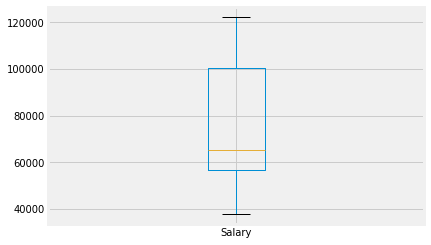

In [3]:
#boxplot of salary 
df.boxplot(column=['Salary'])

There are no outlier in our dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


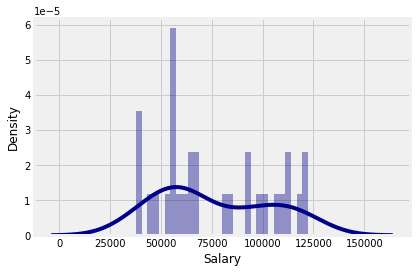

In [4]:
sns.distplot(df['Salary'], 
             hist=True,
             kde=True, 
             bins=30, color = 'darkblue', 
             )
plt.show()

### PERFORM SIMPLE LINEAR REGRESSION

In [5]:
# import statsmodel library :
import statsmodels.api as sm
# define response variable: 
y=df['Salary']
#define explanatory variale:
x= df['YearsExperience']
# add constant to predictor variables
x=sm.add_constant(x)
#fit linear regression model
model= sm.OLS(y,x).fit()
#view model summary
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        11:58:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### INTERPRET THE RESULT

From the model summary we can see that the fitted regression equation is:

Salary = 25790 + 9449.96*(YearsExperiance)

Each additional Years Experiance is associated with an average increase in annual salary of $9449.96.

The intercept value of 25790 tells us the average expected anual salary for an employee may receive

How to interpret the rest of the model summary:

P>|t|: p-value for YearsExperiance (0.000) is significantly less than .05, we can say that there is a statistically significant association between YearsExperiance and Salary.

R-squared: In general, the larger the R-squared value of a regression model the better the explanatory variables are able to predict the value of the response variable. In this case, 95.7% of the variation in scores can be explained by hours studied.

F-statistic & p-value: The F-statistic (622.5) and the corresponding p-value (1.14e-20) tell us the overall significance of the regression model Since the p-value in this example is less than .05, our model is statistically significant.

RESIDUAL PLOT

One of the key assumptions of linear regression is that the residuals of a regression model are roughly normally distributed and are homoscedastic.

To verify that thE assumptions IS met, we can create the following residual plots:

Residual vs. fitted values plot: test homoscedastic

Q-Q plot: test the normal distribution

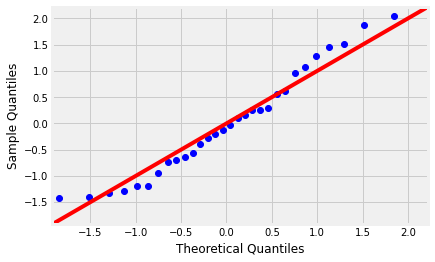

In [6]:
#Q-Q plot:
res = model.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 

We can see in our Q-Q plot above that the data values tend to closely follow the 45-degree, which means the data is likely normally distributed.

Our model is not homogeneous and is normally distributed. Thus, the output from our model is reliable!



### MODEL SAVE

In [7]:
model.save("linear_regression.pickle")